In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bok
import nltk

In [3]:
lyrics_df = pd.read_csv('linguistic_features_01.csv')
lyrics_df

,Unnamed: 0,musicId,positive,negative,neutral,compound,Polarity,Introspection,Temper,Attitude,...,Avg. Chorus Word Length,Song Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies,DocVec Norm,InferVec Norm,Arousal(mean),Valence(mean),Arousal(std),Valence(std)
0,0,1,0.299,0.101,0.600,0.9966,0.039695,0.026058,0.000018,0.016646,...,3.736842,0.019875,0.091241,0.001442,2.245172,0.201296,0.4000,0.5750,0.156125,0.160078
1,1,5,0.096,0.338,0.567,-0.9984,0.070948,0.076279,0.005977,0.013302,...,4.064516,0.015248,0.024412,0.001506,1.793216,0.016271,0.1500,0.2000,0.175000,0.203101
2,2,6,0.038,0.315,0.647,-0.9988,-0.018859,-0.012290,-0.001244,-0.000046,...,5.125000,0.017640,0.350000,0.001190,2.791167,0.017019,0.5125,0.3500,0.171847,0.200000
3,3,9,0.132,0.232,0.636,-0.9879,-0.030606,0.001858,-0.006965,0.013221,...,3.835443,0.023221,0.083636,0.001210,1.114908,0.076152,0.4500,0.2875,0.203101,0.158607
4,4,10,0.097,0.197,0.706,-0.9909,0.009457,0.059946,-0.012350,0.005107,...,4.044944,0.015464,0.076412,0.001000,1.566652,0.441977,0.4375,0.4250,0.195656,0.139194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,618,983,0.326,0.136,0.537,0.9913,-0.012644,-0.038148,-0.030269,0.051171,...,3.250000,0.019688,0.800000,0.001164,1.363090,0.016947,0.7750,0.5000,0.108972,0.158114
619,619,984,0.365,0.045,0.590,0.9984,0.069699,0.072205,-0.046917,0.021747,...,3.111111,0.022202,0.625000,0.001418,1.647133,0.016490,0.8250,0.7375,0.100000,0.087500
620,620,985,0.137,0.065,0.798,0.9552,0.054464,0.018446,0.033794,0.029519,...,2.600000,0.018182,0.769231,0.001352,1.471850,0.016133,0.7500,0.7000,0.147902,0.160078
621,621,993,0.041,0.056,0.904,-0.2168,0.074153,0.042398,0.030127,0.034907,...,2.666667,0.032670,0.000000,0.001468,1.066196,0.016926,0.8625,0.7625,0.103833,0.152582


In [4]:
lyrics_df.drop('Unnamed: 0', axis=1, inplace=True)

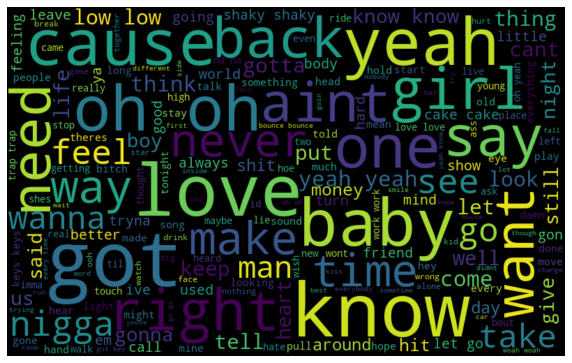

In [13]:
all_words = ' '.join([text for text in lyrics_df['Tokens']]) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=5, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

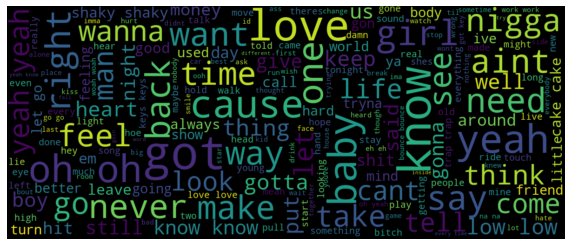

In [21]:
wordcloud = WordCloud(width=1200, height=500, random_state=3, max_font_size=100).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [22]:
import seaborn as sns

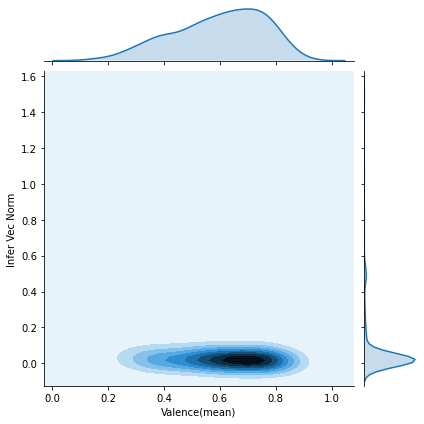

In [211]:
sns.jointplot(x=lyrics_df['Valence(mean)'], y=lyrics_df['Infer Vec Norm'], kind='kde')

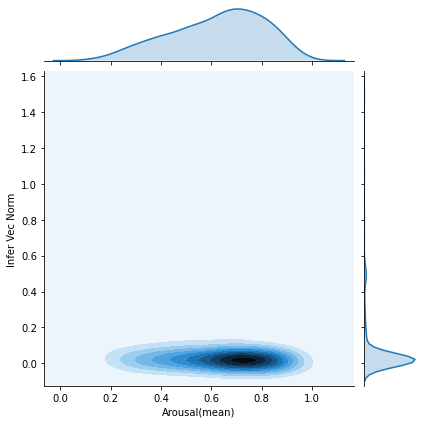

In [210]:
sns.jointplot(x=lyrics_df['Arousal(mean)'], y=lyrics_df['Infer Vec Norm'], kind='kde')

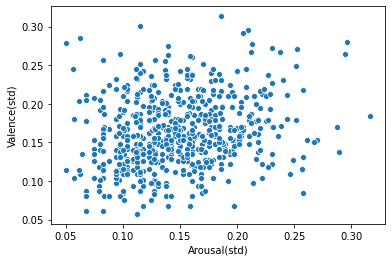

In [24]:
sns.scatterplot(x=lyrics_df['Arousal(std)'], y=lyrics_df['Valence(std)'])

In [25]:
lyrics_df.columns

Index(['musicId', 'fileName', 'title', 'artist', 'album', 'duration',
       'chorus_start_time', 'chorus_end_time', 'Lyrics',
       'Avg. Words/Sentence in Song', 'Avg. Words/Second in Song',
       'Chorus Lyrics', 'Avg. Words/Sentence in Chorus',
       'Avg. Words/Second in Chorus', 'Tokens', 'Chorus Tokens', 'negative',
       'neutral', 'positive', 'compound', 'Average Word Length in Lyrics',
       'Average Word Length in Chorus', 'Lyrics Vocabulary Richness',
       'Chorus Vocabulary Richness', 'Function Word Frequencies',
       'Document Vectors', 'Doc Vec Norm', 'Infer Vectors', 'Infer Vec Norm',
       'Arousal(mean)', 'Valence(mean)', 'Arousal(std)', 'Valence(std)'],
      dtype='object')

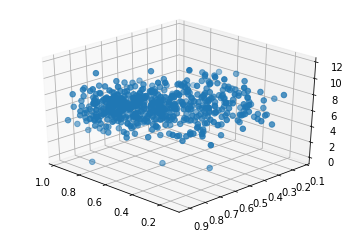

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Avg. Words/Sentence in Song'], s=30)
ax.view_init(30, 135)
plt.show()

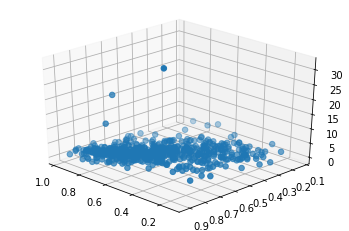

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Avg. Words/Second in Song'], s=30)
ax.view_init(30, 135)
plt.show()

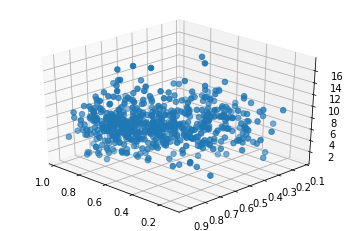

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Avg. Words/Sentence in Chorus'], s=30)
ax.view_init(30, 135)
plt.show()

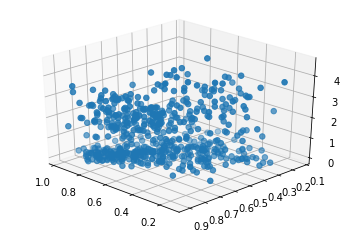

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Avg. Words/Second in Chorus'], s=30)
ax.view_init(30, 135)
plt.show()

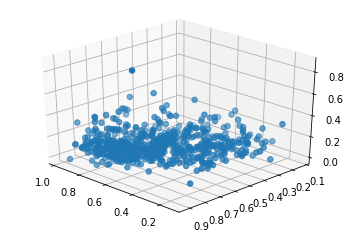

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['negative'], s=30)
ax.view_init(30, 135)
plt.show()

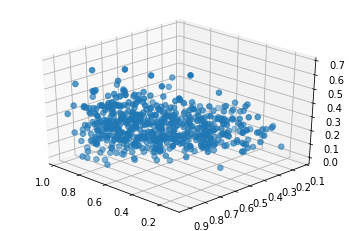

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['positive'], s=30)
ax.view_init(30, 135)
plt.show()

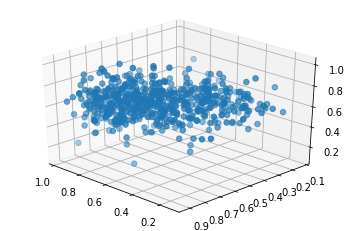

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['neutral'], s=30)
ax.view_init(30, 135)
plt.show()

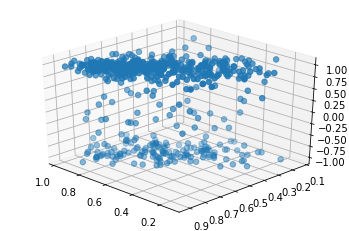

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['compound'], s=30)
ax.view_init(30, 135)
plt.show()

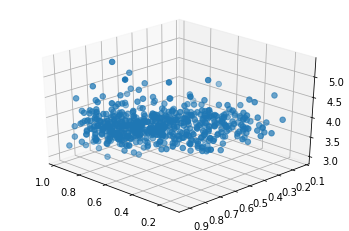

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Average Word Length in Lyrics'], s=30)
ax.view_init(30, 135)
plt.show()

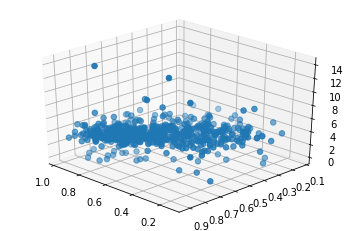

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Average Word Length in Chorus'], s=30)
ax.view_init(30, 135)
plt.show()

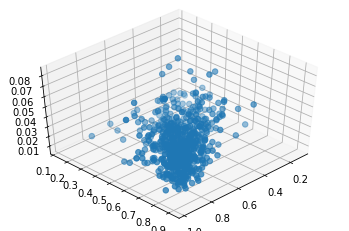

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Lyrics Vocabulary Richness'], s=30)
ax.view_init(45, 45)
plt.show()

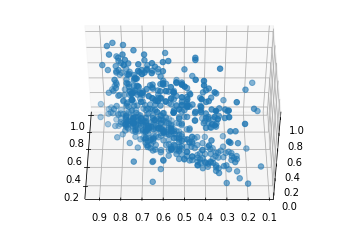

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Chorus Vocabulary Richness'], s=30)
ax.view_init(45, 180)
plt.show()

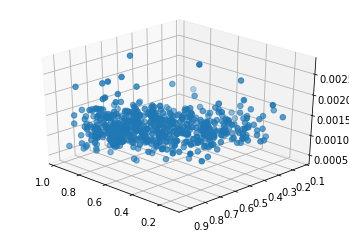

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Function Word Frequencies'], s=30)
ax.view_init(30, 135)
plt.show()

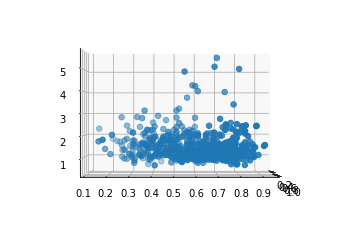

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Doc Vec Norm'], s=30)
ax.view_init(0, 0)
plt.show()

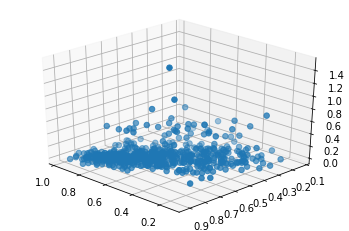

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lyrics_df['Arousal(mean)'], lyrics_df['Valence(mean)'], lyrics_df['Infer Vec Norm'], s=30)
ax.view_init(30, 135)
plt.show()

In [123]:
new_df = lyrics_df[['Avg. Words/Sentence in Song', 'Avg. Words/Second in Song', 'Avg. Words/Sentence in Chorus', 'Avg. Words/Second in Chorus', 'negative', 'positive', 'neutral', 'compound', 'Average Word Length in Lyrics', 'Average Word Length in Chorus', 'Lyrics Vocabulary Richness', 'Chorus Vocabulary Richness', 'Function Word Frequencies', 'Doc Vec Norm', 'Infer Vec Norm']]

In [5]:
new_df = lyrics_df
new_df.drop('musicId', axis=1, inplace=True)
new_df.drop('Arousal(mean)', axis=1, inplace=True)
new_df.drop('Valence(mean)', axis=1, inplace=True)
new_df.drop('Arousal(std)', axis=1, inplace=True)
new_df.drop('Valence(std)', axis=1, inplace=True)

In [6]:
corr = new_df.corr()

In [7]:
mask = np.triu(np.ones_like(corr, dtype=bool))

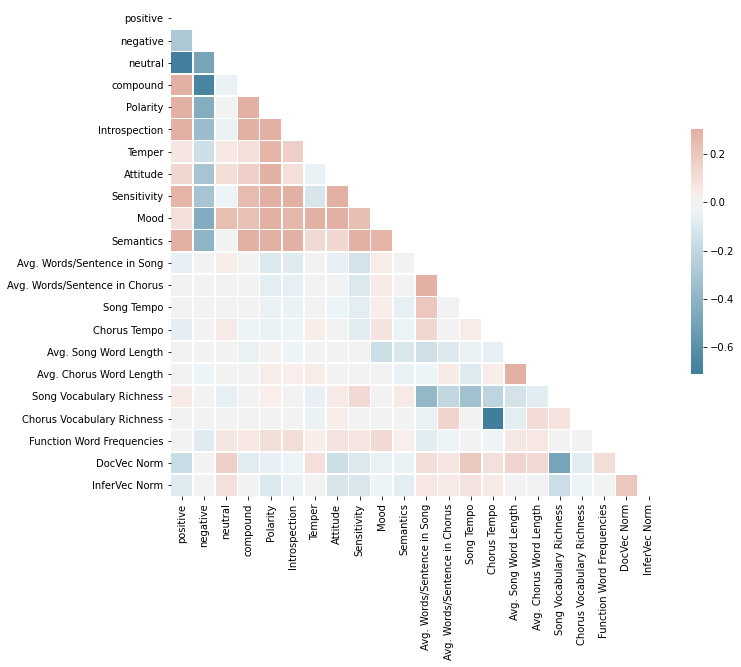

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [129]:
all_df = lyrics_df[['Avg. Words/Sentence in Song', 'Avg. Words/Second in Song', 'Avg. Words/Sentence in Chorus', 'Avg. Words/Second in Chorus', 'negative', 'positive', 'neutral', 'compound', 'Average Word Length in Lyrics', 'Average Word Length in Chorus', 'Lyrics Vocabulary Richness', 'Chorus Vocabulary Richness', 'Function Word Frequencies', 'Doc Vec Norm', 'Infer Vec Norm', 'Arousal(mean)', 'Valence(mean)', 'Arousal(std)', 'Valence(std)']]

In [15]:
lyrics_df = pd.read_csv('linguistic_features_01.csv')
all_df = lyrics_df
all_df.drop('musicId', axis=1, inplace=True)
all_df.drop('Unnamed: 0', axis=1, inplace=True)
corr = all_df.corr()

In [16]:
mask = np.triu(np.ones_like(corr, dtype=bool))

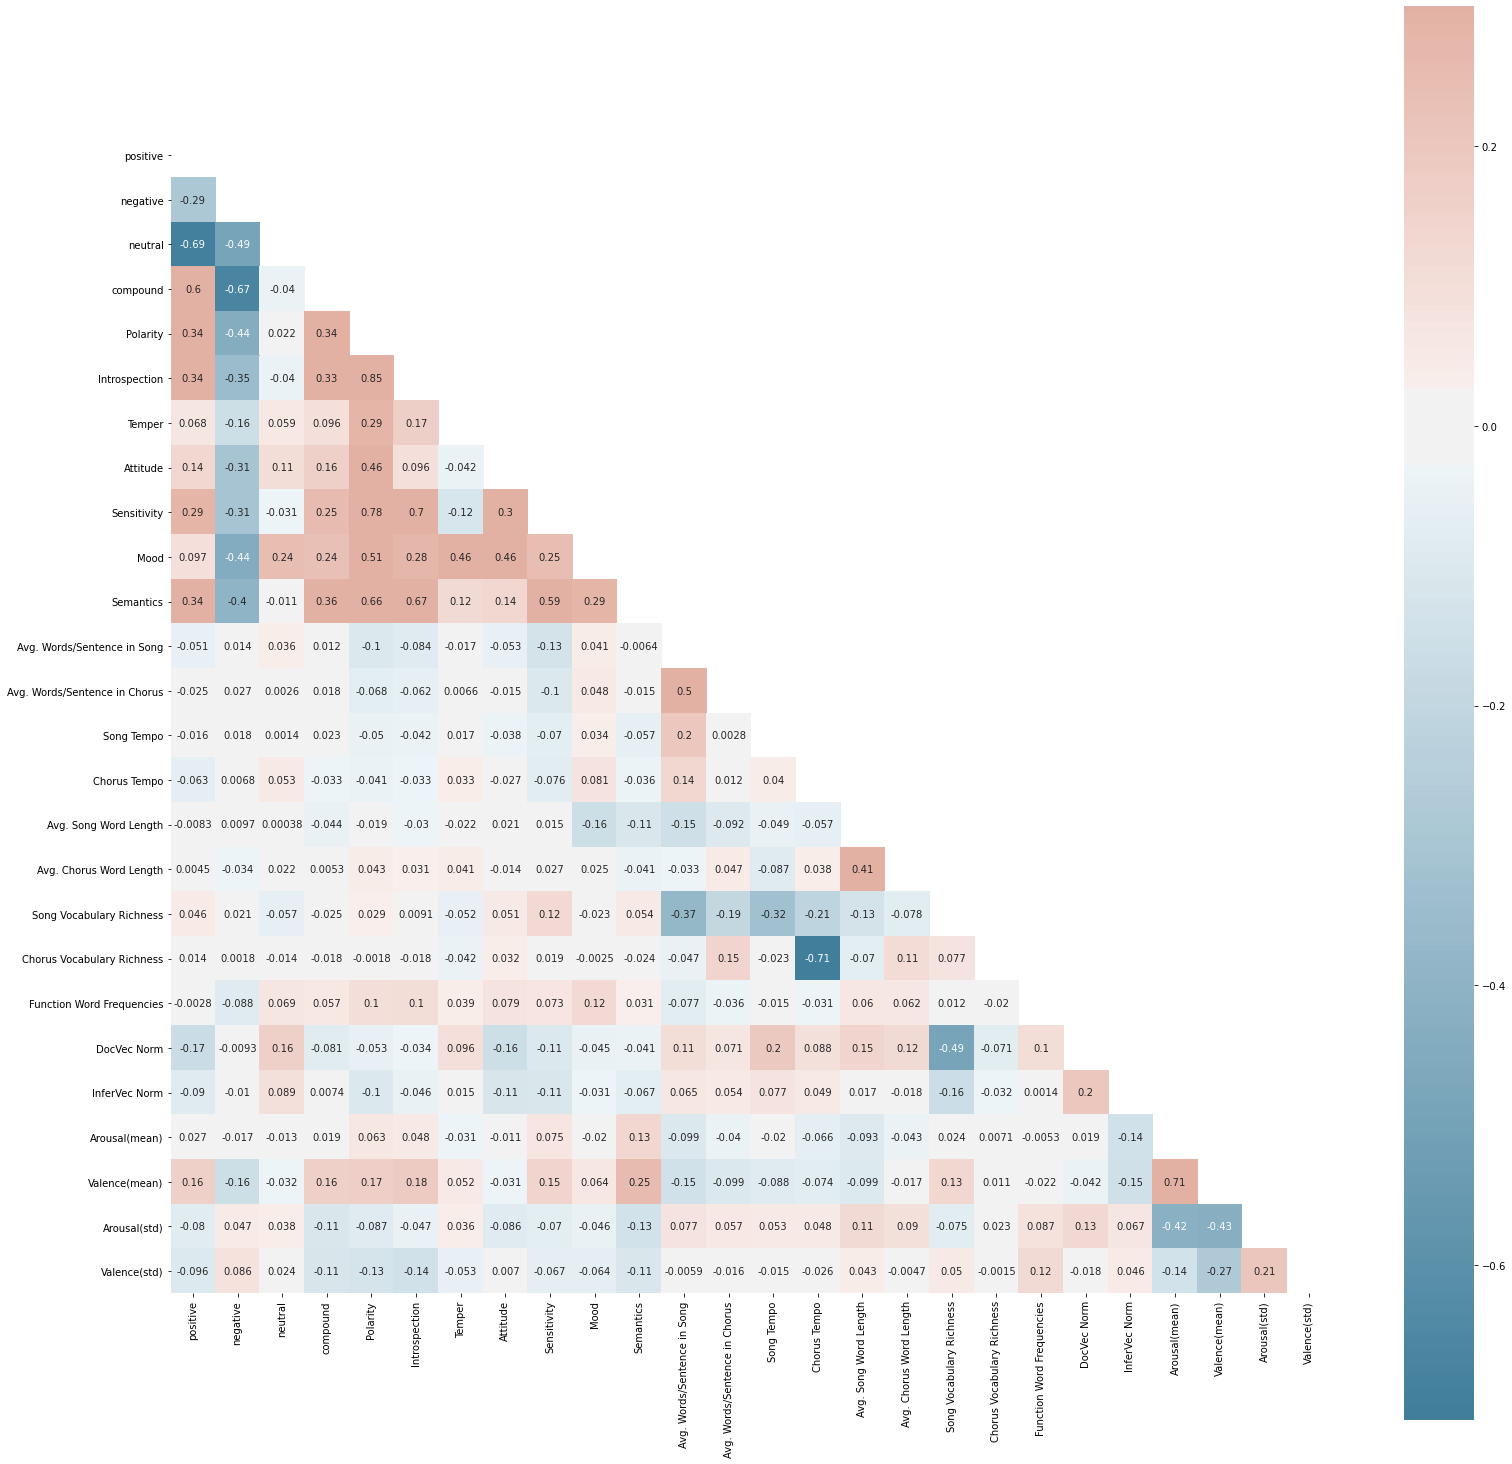

In [48]:
#f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (26,26))
ax = sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0, square=True)
#, linewidths=.5, cbar_kws={"shrink": .5}
plt.show()

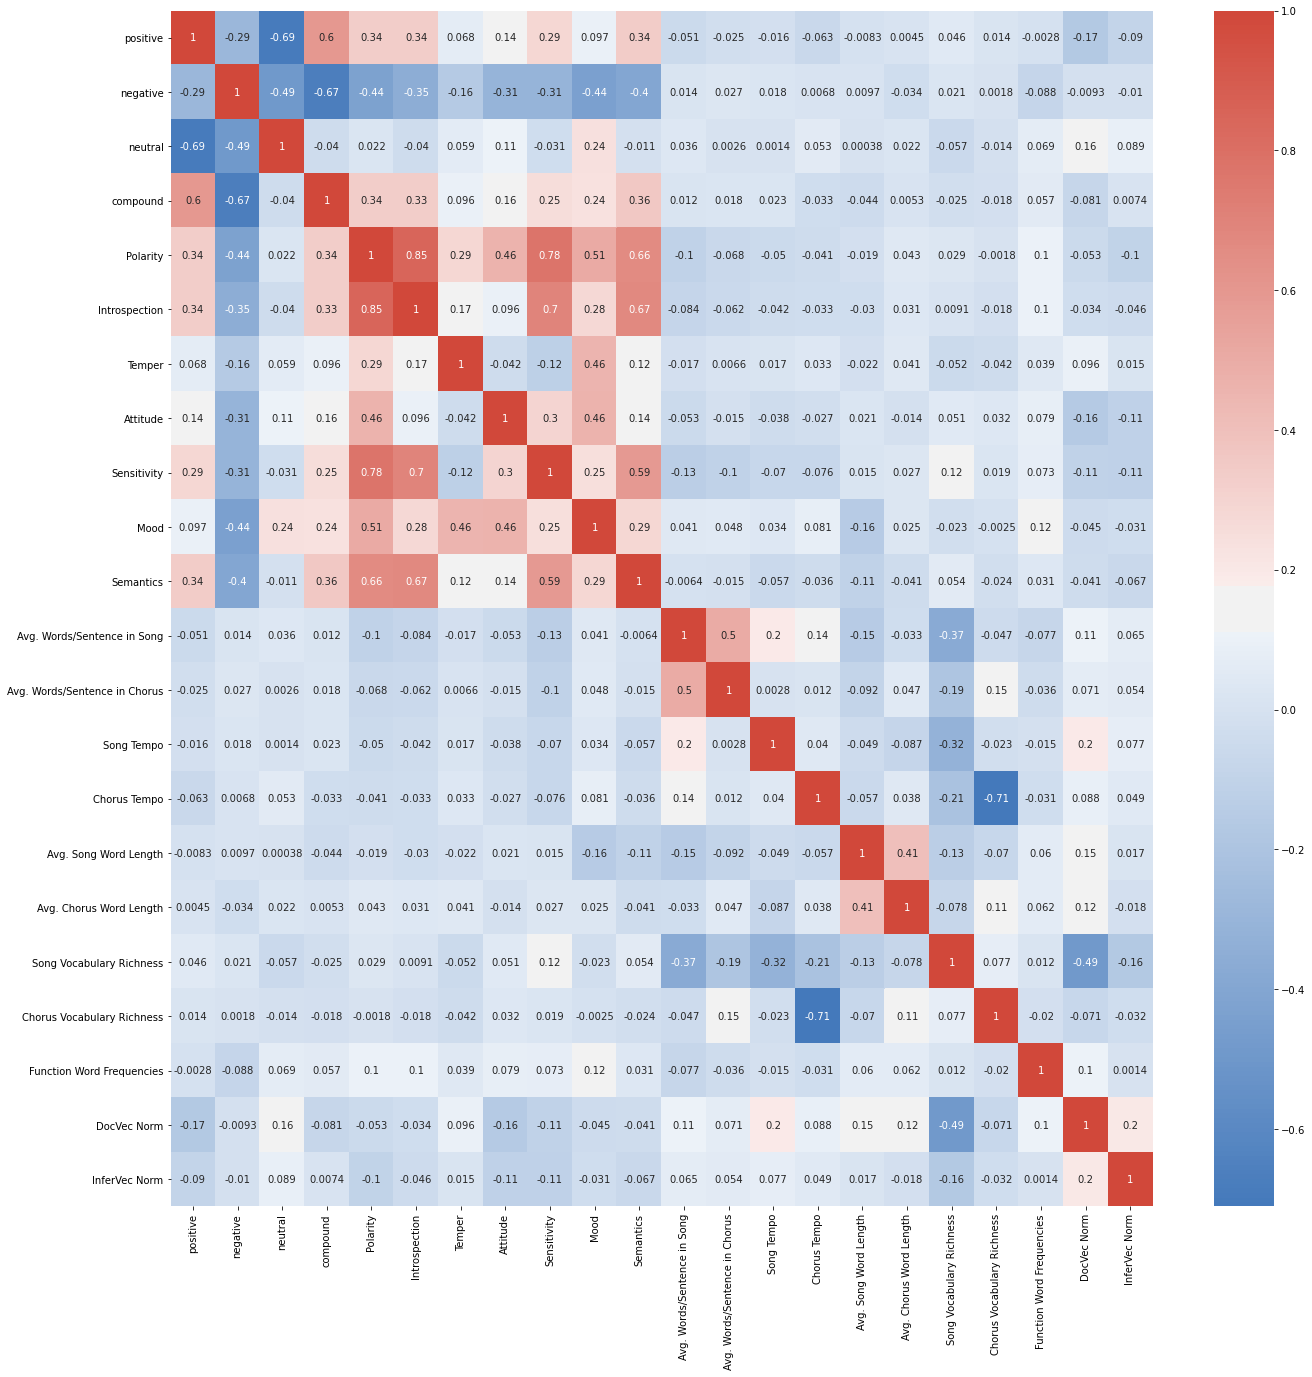

In [39]:
cmap = sns.diverging_palette(250, 15, as_cmap=True)
plt.figure(figsize = (22,22))
ax = sns.heatmap(new_df.corr(), annot=True, cmap=cmap)
plt.show()

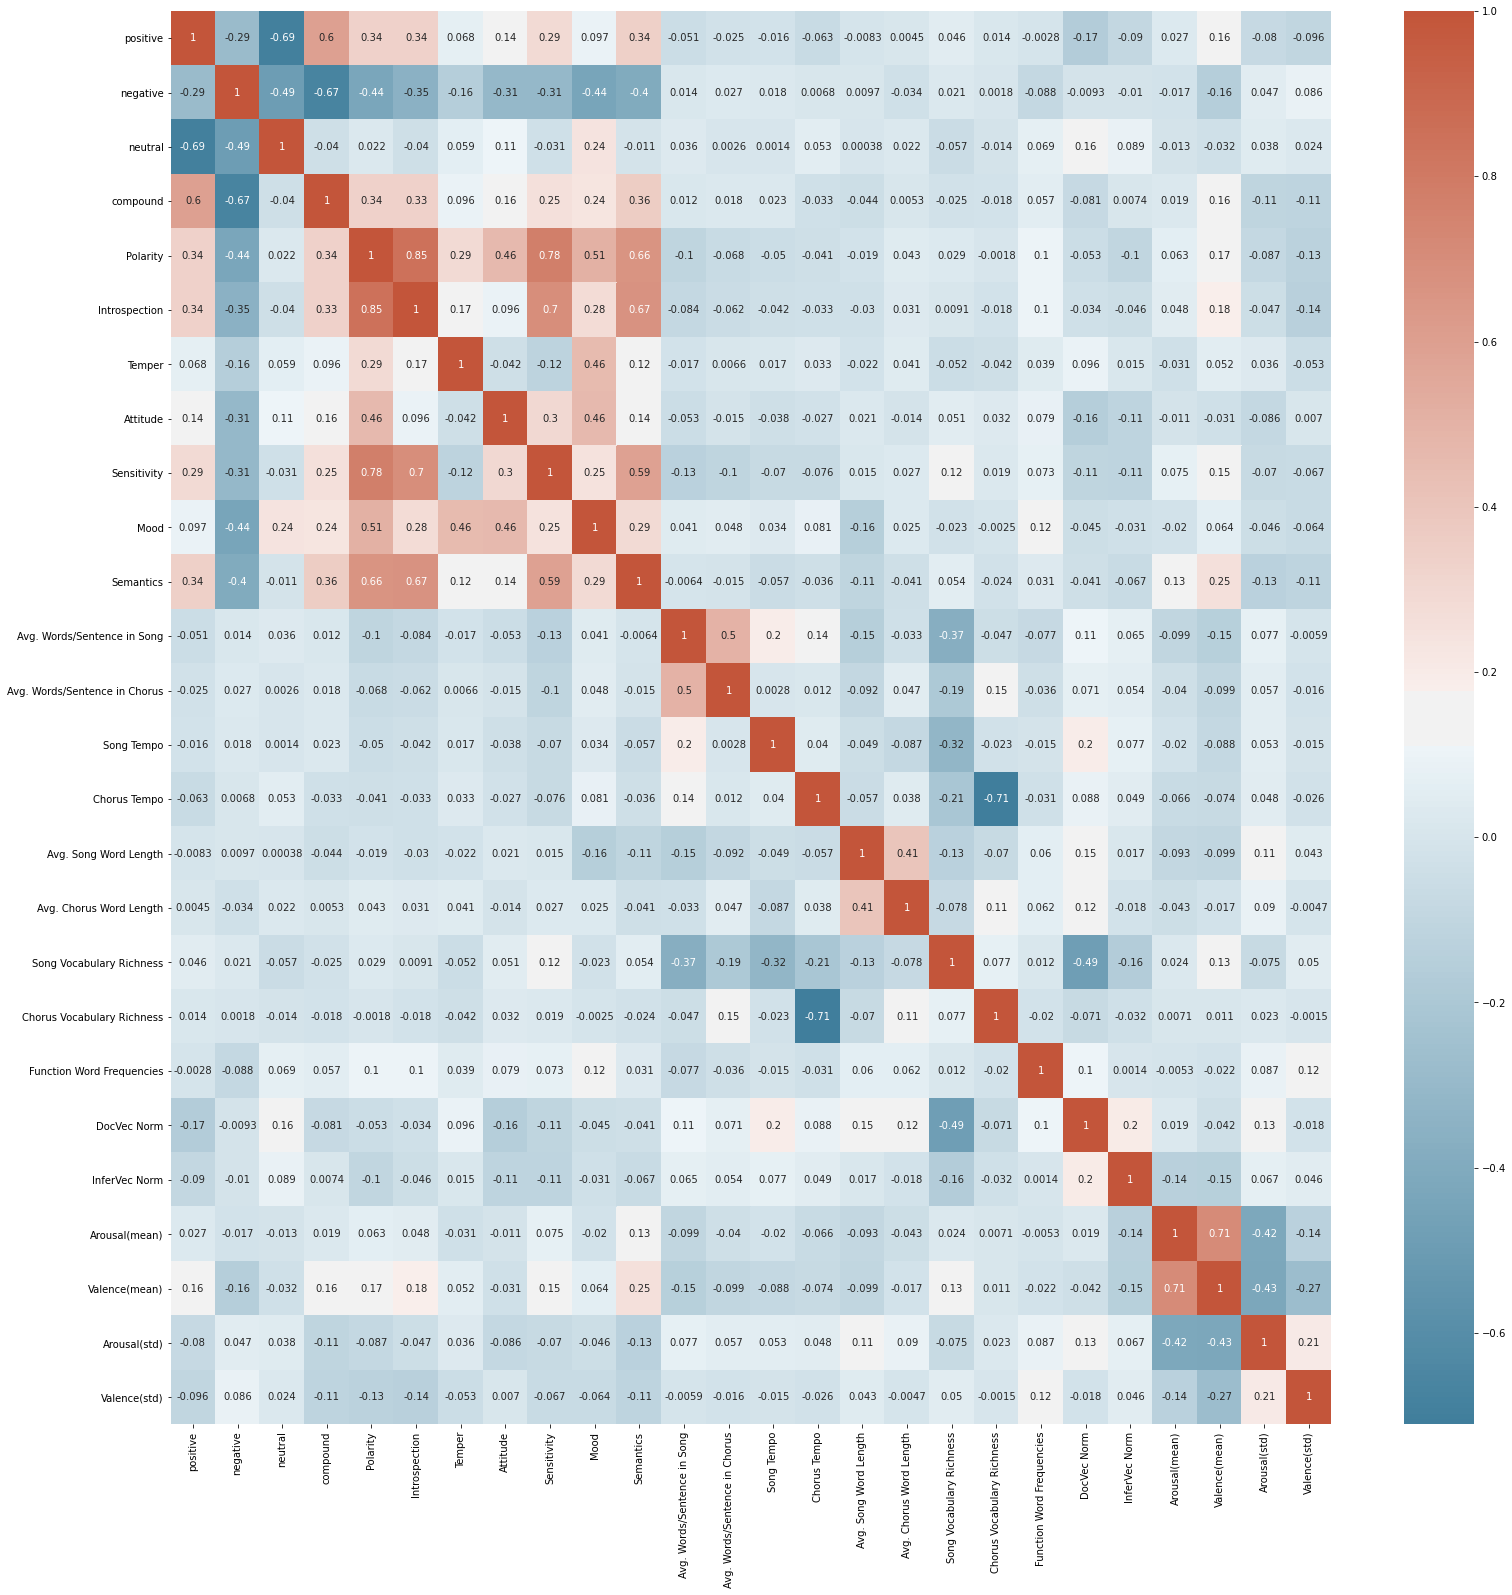

In [45]:
plt.figure(figsize = (26,26))
ax = sns.heatmap(all_df.corr(), annot=True, cmap=cmap)
plt.show()

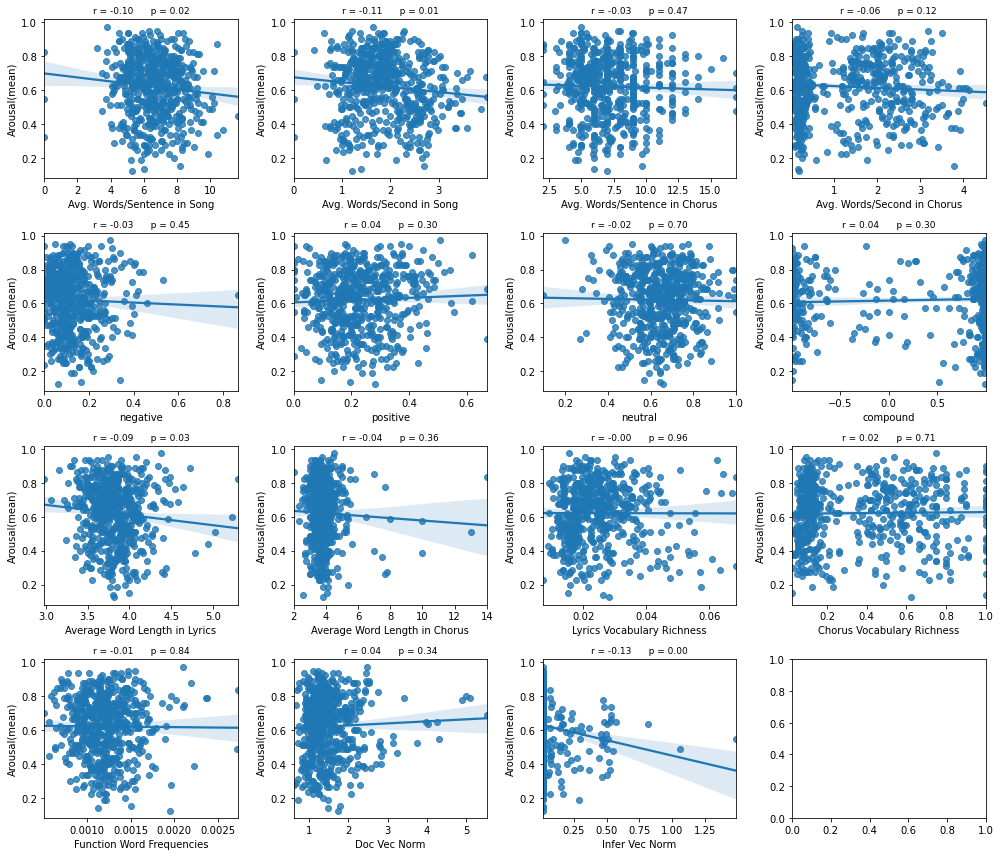

In [194]:
from scipy import stats
datadf = lyrics_df.dropna(axis=0)
listoffeatures =  ['Avg. Words/Sentence in Song', 'Avg. Words/Second in Song', 'Avg. Words/Sentence in Chorus', 'Avg. Words/Second in Chorus', 'negative', 'positive', 'neutral', 'compound', 'Average Word Length in Lyrics', 'Average Word Length in Chorus', 'Lyrics Vocabulary Richness', 'Chorus Vocabulary Richness', 'Function Word Frequencies', 'Doc Vec Norm', 'Infer Vec Norm']
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize = (ncols*3.5, nrows*3))

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i <len(listoffeatures):
            temp = listoffeatures[i]
            sns.regplot(datadf[temp], datadf['Arousal(mean)'].dropna(axis=0), ax = axs[r][c])
            stp = stats.pearsonr(datadf[temp], datadf['Arousal(mean)'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=9)
            
plt.tight_layout()    
plt.show()

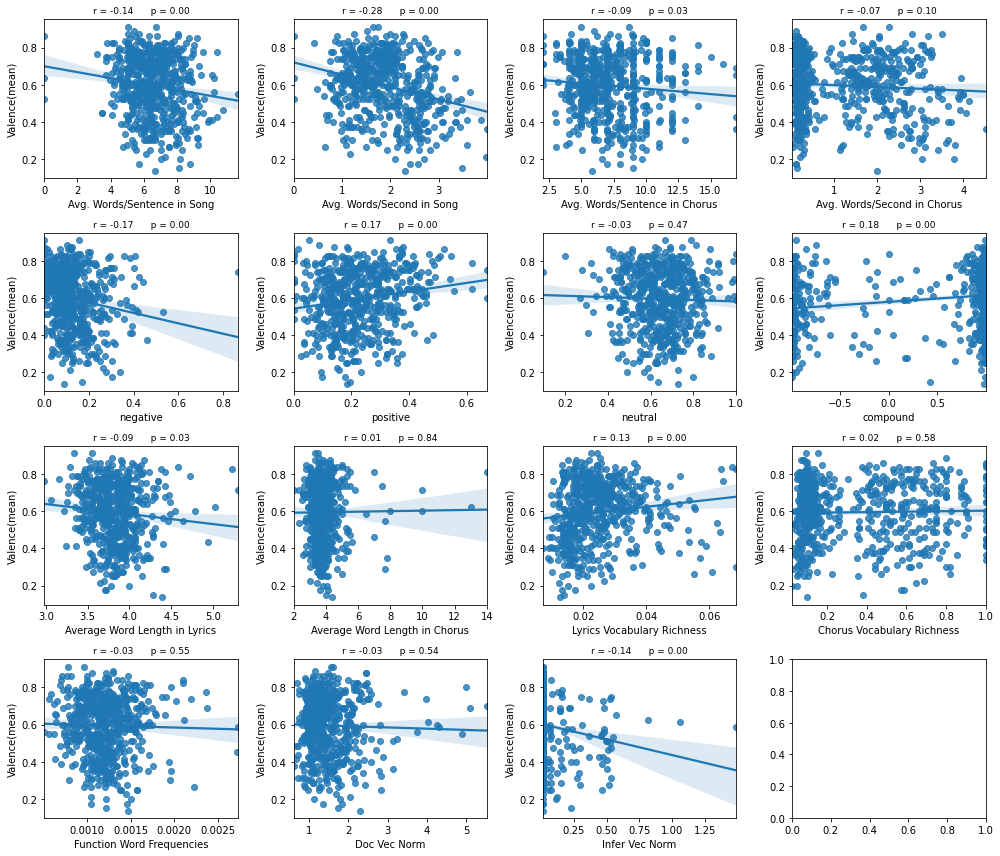

In [195]:
from scipy import stats
datadf = lyrics_df.dropna(axis=0)
listoffeatures =  ['Avg. Words/Sentence in Song', 'Avg. Words/Second in Song', 'Avg. Words/Sentence in Chorus', 'Avg. Words/Second in Chorus', 'negative', 'positive', 'neutral', 'compound', 'Average Word Length in Lyrics', 'Average Word Length in Chorus', 'Lyrics Vocabulary Richness', 'Chorus Vocabulary Richness', 'Function Word Frequencies', 'Doc Vec Norm', 'Infer Vec Norm']
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize = (ncols*3.5, nrows*3))

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c
        if i <len(listoffeatures):
            temp = listoffeatures[i]
            sns.regplot(datadf[temp], datadf['Valence(mean)'].dropna(axis=0), ax = axs[r][c])
            stp = stats.pearsonr(datadf[temp], datadf['Valence(mean)'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=9)
            
plt.tight_layout()    
plt.show()